x: [0.0, 2.0, 2.5, 3.5, 3.0, 6.0]
y: [0.0, 4.0, -1.0, -5.0, 2.0, 3.0]
z: [-1.0, 0.0, 1.7, 2.2, 3.2, 4.6, 7.5, 9.0]
Mine answer:
-2.0
0.0
3.4
1.9999999999999982
2.066666666666667
2.533333333333333
3.5
4.0
Linalg answer:
0.0
0.0
3.4
1.9999999999999982
-3.8000000000000007
2.533333333333333
3.0
3.0


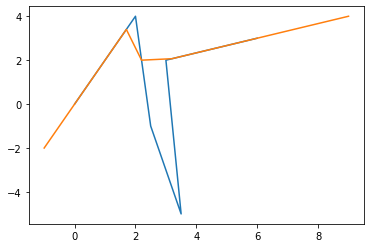

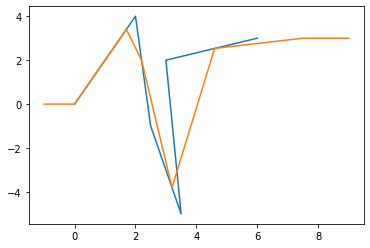

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def reading(x, y, z):
    train_dat = open('train1.dat')
    for i in train_dat.readline().split():
        x.append(float(i))
    train_dat.close()

    train_ans = open('train1.ans')
    for i in train_ans.readline().split():	
        y.append(float(i))
    train_ans.close()

    test_dat = open('test1.dat')
    for i in test_dat.readline().split():
        z.append(float(i))
    test_dat.close()

    return x, y, z

def cofficients(x ,y):
    a = np.zeros(n)
    b = np.zeros(n)
    for i in range(n-1):
        a[i] = (y[i + 1] - y[i]) / (x[i + 1] - x[i])
        b[i] = y[i]
    return a, b


def get_answer(test_ans, x, y, z, m):
    answer = np.zeros(m)
    for j in range(0, m):
        for i in range(0 ,n - 1):
            if (z[j] < x[0]):
                answer[j] = a[0] * (z[j] - x[0]) + b[0]
            if (z[j] >= x[n - 1]):
                answer[j] = a[n - 2] * (z[j] - x[n - 2]) + b[n - 2]

            if (z[j] < x[i + 1] and x[i] <= z[j]):
                answer[j] = a[i] * (z[j] - x[i]) + b[i]

    test_ans.write(str(answer[j]) + ' ')
    return answer

x, y, z = [], [], []

x, y, z = reading(x, y, z)

n = int(len(x))
m = int(len(z))
print('x:', x)
print('y:', y)
print('z:', z)

a, b = cofficients(x, y)

test_ans = open('test1.ans', 'w')
answer = get_answer(test_ans, x, y, z, m)
for i in answer:
    test_ans.write(str(i) + " ")
test_ans.write("\n")

test_ans.close()


print('Mine answer:')
for i in answer:
    print(i)

print('Linalg answer:')
for i in np.interp(z, x, y):
    print(i)

plt.plot(x, y) #Голубой график
plt.plot(z, answer) #Оранжевый график
plt.show()

plt.plot(x, y)
plt.plot(z, np.interp(z, x, y))
plt.show()

x: [0.0, 2.0, 2.5, 3.5, 3.0, 6.0]
y: [0.0, 4.0, -1.0, -5.0, 2.0, 3.0]
z: [-1.0, 0.0, 1.7, 2.2, 3.2, 4.6, 7.5, 9.0]
My answer:
-985.6999999999999
0.0
16.018041142857147
0.05794590476190284
1.4051839999999978
-106.37506133333329
3362.5357142857147
18398.55
Linalg answer:
-985.6999999999998
0.0
16.018041142857264
0.05794590476190251
1.4051840000001903
-106.37506133333291
3362.5357142857292
18398.55000000001


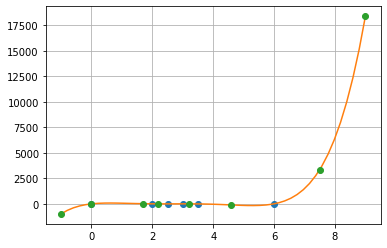

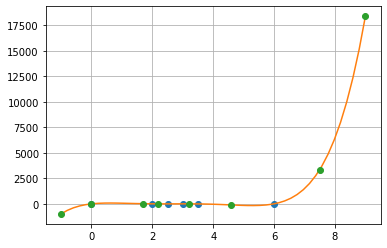

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange


def phi (i, x, y, t):
    p = 1
    for j in range(n):
        if j != i:
            p = p * ((t - x[j]) / ( x [ i ] - x [ j ]))
        if j == i:
            p *= 1
    return p

def P (x, y, t):
    s = 0
    for i in range(n):
        s = s + y[i] * phi(i, x, y, t)
    return s


def reading(x, y, z):
    train_dat = open('train2.dat')
    for i in train_dat.readline().split():
        x.append(float(i))
    train_dat.close()

    train_ans = open('train2.ans')
    for i in train_ans.readline().split():	
        y.append(float(i))
    train_ans.close()

    test_dat = open('test2.dat')
    for i in test_dat.readline().split():
        z.append(float(i))
    test_dat.close()

    return x, y, z

x, y, z = [], [], []
x, y, z = reading(x, y, z)

n = len(x)
m = len(y)

print('x:', x)
print('y:', y)

answer = []
test_ans = open('test2.ans', 'w')
for i in z:
    answer.append(P(x, y, i))
for i in answer:
    test_ans.write(str(i) + " ")
test_ans.write("\n")

test_ans.close()
print('z:', z)
print("My answer:")
for i in answer:
    print(i)


print("Linalg answer:")
for i in lagrange(x, y)(z):
    print(i)

#Build My interpolate
min_xz = min( np.min(x), np.min(z) )
max_xz =  max( np.max(x), np.max(z) )

xnew = np.linspace(min_xz , max_xz, 50 )
ynew = []
for el in xnew:
    ynew.append(P(x,y,el))

plt.plot(x, y, 'o', xnew, ynew)
plt.plot(z, answer, 'o')
plt.grid(True)
plt.show()


#Build Linalg interpolate 
min_xz = min( np.min(x), np.min(z) )
max_xz =  max( np.max(x), np.max(z) )

xnew = np.linspace(min_xz , max_xz, 50 )
ynew = []
for el in xnew:
    ynew.append(lagrange(x,y)(el))

plt.plot(x, y, 'o', xnew, ynew)
plt.plot(z, answer, 'o')
plt.grid(True)
plt.show()

X: [2. 3. 4. 5.]
Y: [1. 4. 2. 5.]
Z: [2.1 2.2 3.2 3.5 3.7 4.2 4.6]
A: [-1.6666666666666667, 3.3333333333333335, -1.6666666666666667, 0]
B: [0.0, -5.0, 5.0, 0]
C: [4.666666666666667, -0.33333333333333326, -0.3333333333333335, 0]
D: [1.0, 4.0, 2.0, 0]
My function: [1.465 1.92  3.76  3.    2.46  2.12  3.24 ]
Linalg function: [1.81 2.48 3.68 3.   2.53 1.88 2.56]


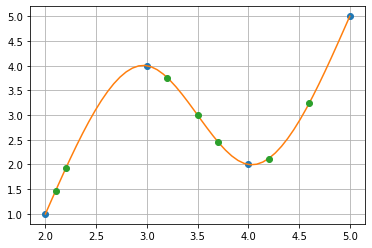

In [2]:
import string
import numpy as np
from scipy import interpolate
import scipy
import matplotlib.pyplot as plt

def interpolate(t, m, n, x, A, B, C, D, handle):
    f = np.zeros(m)
    for j in range(m):
        for i in range(0, n - 1):
            if (x[i] <= t[j] and t[j] <= x[i+1]):
                f[j] = A[i]*(t[j]-x[i])**3 + B[i]*(t[j]-x[i])**2 + C[i]*(t[j]-x[i]) + D[i]
    return f


def sweep ( a, b, c, f, n):
    alpha = (n + 1) * [0]
    beta = (n + 1) * [0]
    x = n * [0]
    a[0] = 0
    c[n -  1] = 0
    alpha[0] = 0
    beta[0] = 0
    for i in range(0, n):  
        d = a[i] * alpha[i] + b[i]
        alpha [i + 1] = -c[i] / d
        
        beta [i + 1] = (f[i] - (a[i] * beta[i])) / (d)
    x[n - 1] = beta[n]
    for i in range(n - 2, -1, -1):
        x[i] = alpha[i + 1] * x[i + 1] + beta[i + 1]
    return x

def generateSpline (x , y):
    n = x.shape[0] - 1
    h = ( x[ n ] - x[0]) / n
    a = np.array ([0] + [1] * ( n - 1) + [0])
    b = np.array ([1] + [4] * ( n - 1) + [1])
    c = np.array ([0] + [1] * ( n - 1) + [0])

    f = np.zeros (n + 1)
    for i in range (1 , n):
        f[ i ] = 3 * ( y [i -1] - 2 * y[i ] + y[i + 1]) / h**2
    s = sweep( a , b , c , f, n + 1)
    B = [0] * (n + 1)   
    A = [0] * (n + 1)
    C = [0] * (n + 1)
    D = [0] * (n + 1)
    for i in range (n):
        B [ i ] = s [ i ]
        D [ i ] = y [ i ]
    for i in range(n):
        A[i] = (B[i + 1] - B[i]) / (3 * h)
        C[i] = ((y[i + 1] - y[i]) / h) - ((B[i + 1] + 2 * B[i]) * h) / 3
    return A , B , C , D

handle = open("train.dat")

x = []
x = [float(i) for i in handle.readline().split()]
handle.close()
handle = open("train.ans")
y = []
y = [float(i) for i in handle.readline().split()]
handle.close()
handle = open('test.dat')
z = []
z = [float(i) for i in handle.readline().split()]
handle.close()
x = np.array(x)
print('X:', x)
y = np.array(y)
print('Y:', y)
z = np.array(z)
print('Z:', z)
n = int(len(x))
m = int(len(z))
A, B ,C , D = generateSpline(x, y)
handle = open('test.ans', 'w')
for el in A:
    handle.write(str(el) + " ")
handle.write("\n")
for el in B:
    handle.write(str(el) + " ")
handle.write("\n")
for el in C:
    handle.write(str(el) + " ")
handle.write("\n")
for el in D:
    handle.write(str(el) + " ")
handle.write("\n")

print("A:", A)
print("B:", B)
print("C:", C)
print("D:", D)  

function = interpolate(z, m,n,  x, A, B, C, D, handle)
print("My function:", function)
print("Linalg function:", scipy.interpolate.InterpolatedUnivariateSpline(x, y)(z))

min_xz = min( np.min(x), np.min(z) )
max_xz =  max( np.max(x), np.max(z) )

xnew = np.linspace(min_xz , max_xz, 50 )
ynew = interpolate(xnew, len(xnew), n, x, A, B, C, D, handle)


plt.plot(x, y, 'o', xnew, ynew)
plt.plot(z, function, 'o')
plt.grid(True)
plt.show()

handle.close()
